In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df=pd.DataFrame(sns.load_dataset('titanic'))
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
drop_col=df.isnull().sum()[df.isnull().sum()>35/100*df.shape[0]]
drop_col

deck    688
dtype: int64

In [9]:
df.drop(drop_col.index,axis=1,inplace=True)

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.fillna(df.mean(),inplace=True)

In [12]:
df.count()

survived       891
pclass         891
sex            891
age            891
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
embark_town    889
alive          891
alone          891
dtype: int64

In [13]:
df['embark_town'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: embark_town, dtype: object

In [14]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [17]:
df['embark_town'].fillna('Southampton',inplace=True)

In [19]:
df.drop('embarked',axis=1,inplace=True)

In [20]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [22]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [23]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='survived', ylabel='count'>

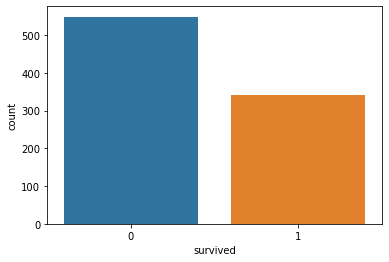

In [24]:
sns.countplot(df['survived'])

<AxesSubplot:xlabel='age'>

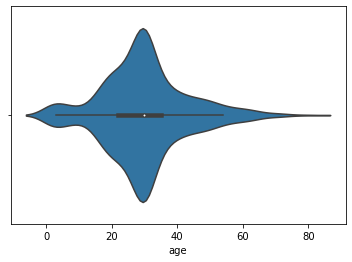

In [27]:
sns.violinplot(df['age'])

From violin graph we can say that most people age between 20 to 40 years are travelled in titanic

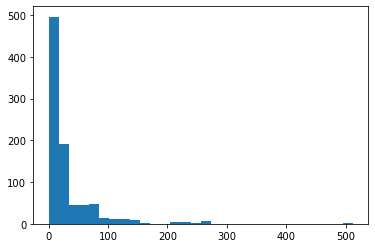

In [31]:
plt.hist(df['fare'],bins=30)
plt.show()

Help of the histogram see that fare of the passengers are between 0 to 20 is maximum

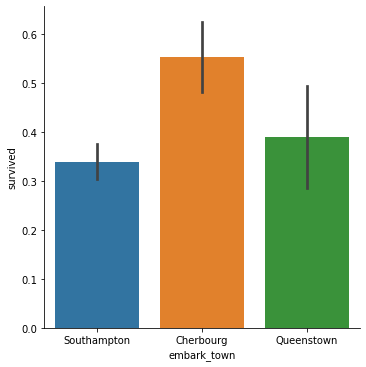

In [35]:
sns.catplot(x='embark_town',y='survived',data=df,kind='bar')

Graph show that the peoples are survived more in that 'Cherbourg' town people

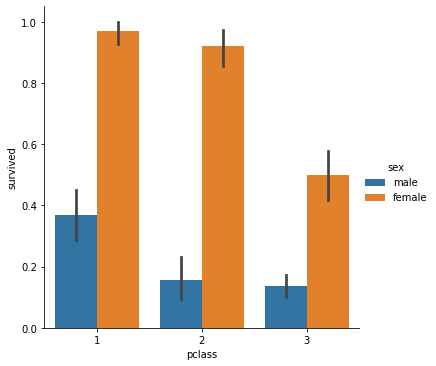

In [36]:
sns.catplot(x='pclass',y='survived',hue='sex',data=df,kind='bar')

From the graph analylises we say that from the first calss passenger survived more and also in that female passenger survived greater

Text(0.5, 1.0, 'Passengers Class')

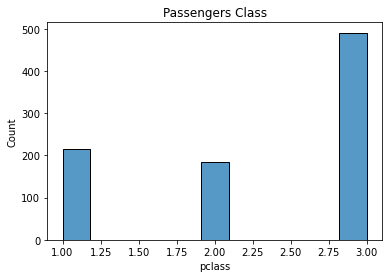

In [43]:
sns.histplot(x='pclass',data=df)
plt.title('Passengers Class')

In that graph in 3rd class more passenger are travelled but survived less than 1 st class passenger
more casuality happened in 3rd class passenger

In [45]:
df['familysize']=df['sibsp']+df['parch']
df.drop(['sibsp','parch'],axis=1,inplace=True)
df.corr()

,survived,pclass,age,fare,adult_male,alone,familysize
survived,1.000000,-0.338481,-0.069809,0.257307,-0.557080,-0.203367,0.016639
pclass,-0.338481,1.000000,-0.331339,-0.549500,0.094035,0.135207,0.065997
age,-0.069809,-0.331339,1.000000,0.091566,0.253236,0.179775,-0.248512
fare,0.257307,-0.549500,0.091566,1.000000,-0.182024,-0.271832,0.217138
adult_male,-0.557080,0.094035,0.253236,-0.182024,1.000000,0.404744,-0.348143
alone,-0.203367,0.135207,0.179775,-0.271832,0.404744,1.000000,-0.690922
familysize,0.016639,0.065997,-0.248512,0.217138,-0.348143,-0.690922,1.000000


In [47]:
df['familysize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [49]:
df['alone']=[0 if df['familysize'][i]>0 else 1 for i in df.index]
df.head(10)

,survived,pclass,sex,age,fare,class,who,adult_male,embark_town,alive,alone,familysize
0,0,3,male,22.000000,7.2500,Third,man,True,Southampton,no,0,1
1,1,1,female,38.000000,71.2833,First,woman,False,Cherbourg,yes,0,1
2,1,3,female,26.000000,7.9250,Third,woman,False,Southampton,yes,1,0
3,1,1,female,35.000000,53.1000,First,woman,False,Southampton,yes,0,1
4,0,3,male,35.000000,8.0500,Third,man,True,Southampton,no,1,0
5,0,3,male,29.699118,8.4583,Third,man,True,Queenstown,no,1,0
6,0,1,male,54.000000,51.8625,First,man,True,Southampton,no,1,0
7,0,3,male,2.000000,21.0750,Third,child,False,Southampton,no,0,4
8,1,3,female,27.000000,11.1333,Third,woman,False,Southampton,yes,0,2
9,1,2,female,14.000000,30.0708,Second,child,False,Cherbourg,yes,0,1


In [50]:
df.groupby(['alone'])['survived'].mean()

alone
0    0.505650
1    0.303538
Name: survived, dtype: float64

If the passenger alone survival chances are less

In [54]:
df[['alone','fare']].corr()

,alone,fare
alone,1.000000,-0.271832
fare,-0.271832,1.000000


if the person was not alone the chance of ticket price is higher

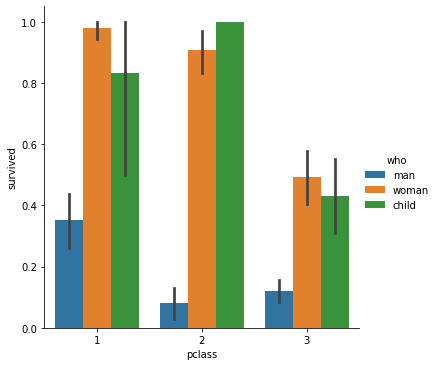

In [61]:
sns.catplot(x='pclass',y='survived',hue='who',data=df,kind='bar')

From the categary plot we say that children and female are survived more